<a href="https://colab.research.google.com/github/vanshika7-max/Demand-Prediction-for-Public-Transport-/blob/main/Vanshika_Raj_Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [1]:
# Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
Transport_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/Day 1/train_revised.csv')

# Print the first 5 rows of the dataframe.
Transport_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [4]:
print(Transport_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB
None


In [5]:
Transport_df['travel_date'] = pd.to_datetime(Transport_df['travel_date'], errors='coerce')
Transport_df['day_of_week'] = Transport_df['travel_date'].dt.day_name()

Transport_df.head(3)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,Tuesday
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,Sunday
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,Sunday


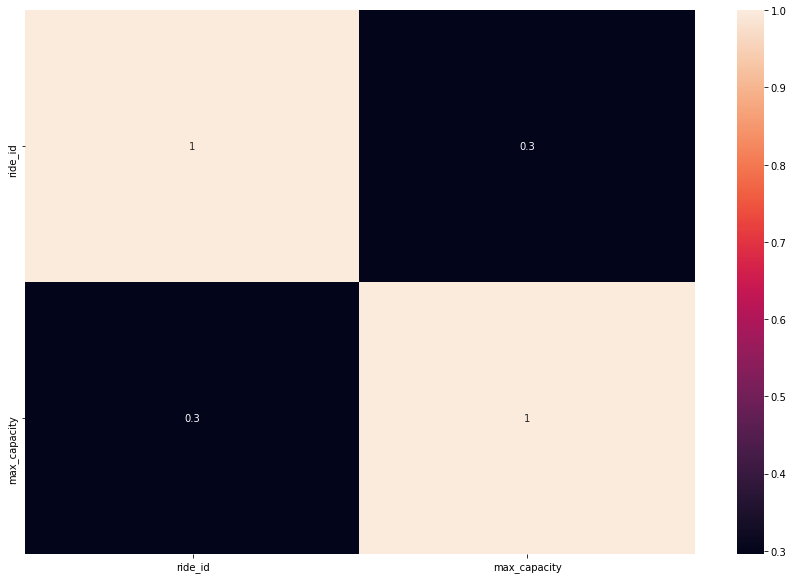

In [6]:
# Checking the coorelation between independent variables

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(Transport_df.corr().abs(),  annot=True)

In [7]:
Transport_df['car_type'].value_counts()

Bus        31985
shuttle    19660
Name: car_type, dtype: int64

In [8]:
Transport_df['travel_from'].value_counts()

Kisii        22607
Migori        7027
Homa Bay      6304
Sirare        4449
Rongo         3928
Kehancha      1909
Awendo        1788
Kijauri       1031
Keroka         988
Nyachenge      512
Rodi           405
Mbita          378
Ndhiwa         236
Sori            55
Keumbu          22
Oyugis           5
Kendu Bay        1
Name: travel_from, dtype: int64

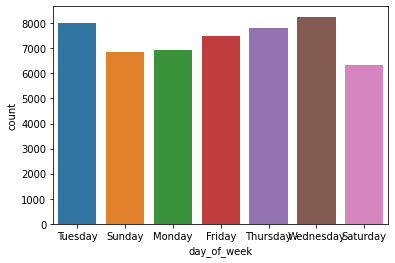

In [9]:
sns.countplot(x=Transport_df['day_of_week'])

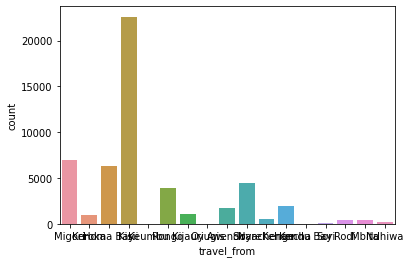

In [10]:
sns.countplot(x=Transport_df['travel_from'])

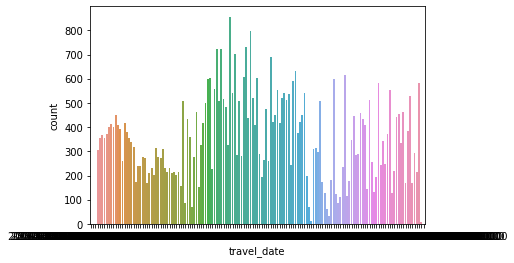

In [11]:
sns.countplot(x=Transport_df['travel_date'])

Text(0, 0.5, 'max_capacity')

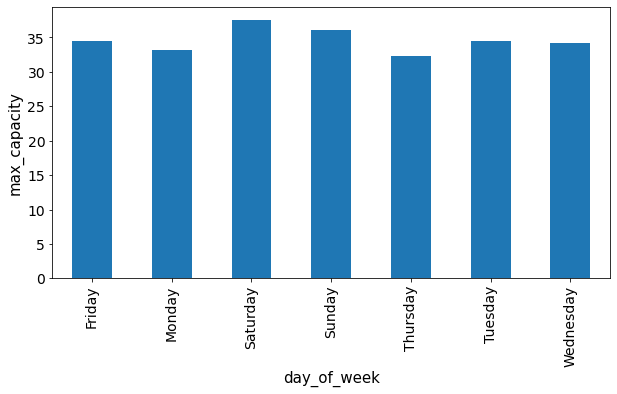

In [12]:

# Create the figure object 
ax = Transport_df.groupby(['day_of_week'])['max_capacity'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
# ax.set_title("Average profit for different states where the startups operate", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("day_of_week", fontsize = 15)
ax.set_ylabel("max_capacity", fontsize = 15)

In [13]:
Transport_df['travel_from'].value_counts()

Kisii        22607
Migori        7027
Homa Bay      6304
Sirare        4449
Rongo         3928
Kehancha      1909
Awendo        1788
Kijauri       1031
Keroka         988
Nyachenge      512
Rodi           405
Mbita          378
Ndhiwa         236
Sori            55
Keumbu          22
Oyugis           5
Kendu Bay        1
Name: travel_from, dtype: int64

In [14]:
Transport_df.corr()

,ride_id,max_capacity
ride_id,1.000000,0.295902
max_capacity,0.295902,1.000000


In [15]:
## Dropping the columns with more than 40% null values
missing_val_count_by_column = Transport_df.isnull().sum()/len(Transport_df)

print(missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending=False))

Series([], dtype: float64)


In [16]:
Transport_df.groupby(['ride_id','payment_receipt']).groups

{(1442, 'UZUEHCBUSO'): [0], (5437, 'TIHLBUSGTE'): [1], (5710, 'EQX8Q5G19O'): [2], (5777, '7C7P3D5AJQ'): [60], (5777, 'B6PBDU30IZ'): [5], (5777, 'MZHGDGS6QZ'): [6], (5777, 'P013NWHQID'): [62], (5777, 'SGP18CL0ME'): [3], (5778, '0OSWJ6JM8N'): [147], (5778, '3AV73FAQZD'): [116], (5778, '5BMZTIAZL5'): [149], (5778, 'BGVHH54WNQ'): [173], (5778, 'BM97HFRGL9'): [4], (5778, 'CH37TFO0Q4'): [146], (5778, 'F7JWUFQ6SD'): [63], (5778, 'FWLBIYKARK'): [284], (5778, 'IHJCLFMAAA'): [154], (5778, 'JDD4ZL64LP'): [14], (5778, 'JWDOI1QS3N'): [140], (5778, 'JXQXWWGB36'): [90], (5778, 'K6U8RH1KYC'): [170], (5778, 'KHYNXYC6R6'): [139], (5778, 'ME8DQMDBN3'): [210], (5778, 'MHAE4FQEIR'): [148], (5778, 'MVQQCYAQRH'): [151], (5778, 'MYVTYFNXDZ'): [7], (5778, 'N1ATVDL4AC'): [91], (5778, 'PAQWDAB3P4'): [145], (5778, 'Q34QDMZSYV'): [105], (5778, 'QGLFA2ZT4B'): [162], (5778, 'RTMY3RVXQX'): [252], (5778, 'TE1WYK1NYE'): [8], (5778, 'UA2BFZWHA9'): [224], (5778, 'VHHFKB3YUF'): [185], (5778, 'X8MVFXTK9Z'): [150], (5778, '

In [17]:
Transport_df.groupby(['ride_id','payment_receipt'])['payment_receipt'].value_counts()

ride_id  payment_receipt  payment_receipt
1442     UZUEHCBUSO       UZUEHCBUSO         1
5437     TIHLBUSGTE       TIHLBUSGTE         1
5710     EQX8Q5G19O       EQX8Q5G19O         1
5777     7C7P3D5AJQ       7C7P3D5AJQ         1
         B6PBDU30IZ       B6PBDU30IZ         1
                                            ..
20115    QXBTMGBSWA       QXBTMGBSWA         1
         S3VPRF5XX7       S3VPRF5XX7         1
         UBXFINPUSN       UBXFINPUSN         1
20116    EZHIPJIS2T       EZHIPJIS2T         1
20117    BUSNKXBGQS       BUSNKXBGQS         1
Name: payment_receipt, Length: 51645, dtype: int64

In [18]:
Transport_df.reset_index(drop= True, inplace=True)

In [19]:
Transport_df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,Tuesday
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,Sunday
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,Sunday
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,Monday
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,Monday
...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,8:00,Awendo,Nairobi,Bus,49,Friday
51641,13809,18A,Mpesa,4PEBSVJSNK,2018-04-20,8:00,Migori,Nairobi,Bus,49,Friday
51642,13809,17A,Mpesa,LVN64LZDNN,2018-04-20,8:00,Migori,Nairobi,Bus,49,Friday
51643,13796,16B,Mpesa,REYBSKTYWN,2018-04-20,7:08,Awendo,Nairobi,Bus,49,Friday


In [20]:
ride_id_dic = {}
for ride_id in Transport_df["ride_id"]:
    if not ride_id in ride_id_dic:
        ride_id_dic[ride_id] = 1
    else:
        ride_id_dic[ride_id] += 1

for i in range(len(Transport_df)):
    ride_id = Transport_df.loc[i]["ride_id"]
    Transport_df.at[i,"number_of_tickets"] = ride_id_dic[ride_id]

In [21]:
Transport_df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week,number_of_tickets
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,Tuesday,1.0
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,Sunday,1.0
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,Sunday,1.0
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,Monday,5.0
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,Monday,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,8:00,Awendo,Nairobi,Bus,49,Friday,1.0
51641,13809,18A,Mpesa,4PEBSVJSNK,2018-04-20,8:00,Migori,Nairobi,Bus,49,Friday,29.0
51642,13809,17A,Mpesa,LVN64LZDNN,2018-04-20,8:00,Migori,Nairobi,Bus,49,Friday,29.0
51643,13796,16B,Mpesa,REYBSKTYWN,2018-04-20,7:08,Awendo,Nairobi,Bus,49,Friday,27.0


In [22]:
Transport_df['year'] = pd.DatetimeIndex(Transport_df['travel_date']).year
Transport_df['month'] = pd.DatetimeIndex(Transport_df['travel_date']).month
Transport_df['day'] = pd.DatetimeIndex(Transport_df['travel_date']).day

In [23]:
Transport_df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week,number_of_tickets,year,month,day
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,Tuesday,1.0,2017,10,17
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,Sunday,1.0,2017,11,19
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,Sunday,1.0,2017,11,26
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,Monday,5.0,2017,11,27
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,Monday,31.0,2017,11,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,8:00,Awendo,Nairobi,Bus,49,Friday,1.0,2018,4,20
51641,13809,18A,Mpesa,4PEBSVJSNK,2018-04-20,8:00,Migori,Nairobi,Bus,49,Friday,29.0,2018,4,20
51642,13809,17A,Mpesa,LVN64LZDNN,2018-04-20,8:00,Migori,Nairobi,Bus,49,Friday,29.0,2018,4,20
51643,13796,16B,Mpesa,REYBSKTYWN,2018-04-20,7:08,Awendo,Nairobi,Bus,49,Friday,27.0,2018,4,20


In [32]:
Transport_df['travel_from'] = [1 if values == 'Kisii' else 0 for values in Transport_df['travel_from']]

In [33]:
Transport_df['travel_date'] = pd.to_datetime(Transport_df['travel_date'])

In [34]:

Transport_df['payment_method'] = [1 if values == 'Mpesa' else 0 for values in Transport_df['payment_method']]

In [35]:
Transport_df['day_of_travel_date'] = Transport_df['travel_date'].dt.day #day of travel date
Transport_df['week_of_travel_date'] = Transport_df['travel_date'].dt.week #week of travel date
Transport_df['weekday_of_travel_date'] = Transport_df['travel_date'].dt.weekday

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [36]:
Transport_df.drop('payment_receipt',axis = 1, inplace=True)
Transport_df.drop('travel_date',axis = 1, inplace=True)
Transport_df.drop('day_of_week',axis = 1, inplace=True)
Transport_df.drop('car_type',axis = 1, inplace=True)
Transport_df.drop('travel_to',axis = 1, inplace=True)

In [37]:
Transport_df.drop('seat_number',axis = 1, inplace=True)
Transport_df.drop('travel_time',axis = 1, inplace=True)

In [38]:
Transport_df


,ride_id,payment_method,travel_from,max_capacity,number_of_tickets,year,month,day,day_of_travel_date,week_of_travel_date,weekday_of_travel_date
0,1442,1,0,49,1.0,2017,10,17,17,42,1
1,5437,1,0,49,1.0,2017,11,19,19,46,6
2,5710,1,0,49,1.0,2017,11,26,26,47,6
3,5777,1,0,49,5.0,2017,11,27,27,48,0
4,5778,1,0,49,31.0,2017,11,27,27,48,0
...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,1,0,49,1.0,2018,4,20,20,16,4
51641,13809,1,0,49,29.0,2018,4,20,20,16,4
51642,13809,1,0,49,29.0,2018,4,20,20,16,4
51643,13796,1,0,49,27.0,2018,4,20,20,16,4


In [39]:
# Data for all the independent variables
X = Transport_df.drop(labels='number_of_tickets',axis=1)

# Data for the dependent variable
Y = Transport_df['number_of_tickets']

In [40]:
## Splitting the data into train and test

# Train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [41]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(38733, 10) (38733,)
(12912, 10) (12912,)


In [42]:
X

,ride_id,payment_method,travel_from,max_capacity,year,month,day,day_of_travel_date,week_of_travel_date,weekday_of_travel_date
0,1442,1,0,49,2017,10,17,17,42,1
1,5437,1,0,49,2017,11,19,19,46,6
2,5710,1,0,49,2017,11,26,26,47,6
3,5777,1,0,49,2017,11,27,27,48,0
4,5778,1,0,49,2017,11,27,27,48,0
...,...,...,...,...,...,...,...,...,...,...
51640,13826,1,0,49,2018,4,20,20,16,4
51641,13809,1,0,49,2018,4,20,20,16,4
51642,13809,1,0,49,2018,4,20,20,16,4
51643,13796,1,0,49,2018,4,20,20,16,4


In [43]:
from xgboost import XGBRegressor
XG_model=XGBRegressor()

XG_model.fit(X_train,Y_train)


[06:36:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [46]:
y_pred=XG_model.predict(X_test)
y_pred_train=XG_model.predict(X_train)
    
train_accuracy=accuracy_score(Y_train,y_pred_train)
test_accuracy=accuracy_score(Y_test,y_pred)
p_score=precision_score(Y_test,y_pred,average='micro')
# r_score=recall_score(Y_test,y_pred)
# fp, tp, th = roc_curve(Y_test, y_pred)

# print("Precision Score : ",precision_score(y_test, y_pred, 
#                                            pos_label='positive'
#                                            average='micro'))

#inserting the values in dataframe
df.loc[3,"Model_Name"]=XG_model.__class__.__name__
df.loc[3,"Precision"]=round(p_score,2)
df.loc[3,"Recall"]=round(r_score,2)
df.loc[3,"Train_Accuracy"]=round(train_accuracy,2)
df.loc[3,"Test_Accuracy"]=round(test_accuracy,2)
# df.loc[3,'AUC'] = metrics.auc(fp, tp)

ValueError: ignored

In [ ]:
df

,travel_from,payment_receipt,travel_time,Model_Name,Precision,Train_Accuracy,Test_Accuracy
0,Kisii,UZUEHCBUSO,7:15,NaN,NaN,NaN,NaN
1,Migori,EQX8Q5G19O,7:02,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,XGBClassifier,0.47,0.49,0.47


In [ ]:
accuracy_score=XG_model.score(X_train,Y_train)
accuracy_score

0.48736219760927374

In [ ]:
accuracy_score_test=XG_model.score(X_test,Y_test)
accuracy_score_test

0.47304832713754646

In [48]:
import xgboost as xgb


In [54]:
dreg= xgb.XGBRegressor(min_child_weight= 10, 
            eta= 0.004, 
            colsample_bytree= 0.7, 
            max_depth= 9,
            subsample= 1,  
            nthread= 8, 
            booster = 'gbtree', 
            eval_metric= 'mae', 
            objective= 'reg:linear',
            gamma=0.5 ,
            alpha=0.1,
            silent= 1,
            reg_lambda=0.1)
dreg.fit(X_train, Y_train)
y_pred = dreg.predict(X_test)
#Find R-squared value
# r2 = r2_score(y_test, y_pred)
# Find Adjusted R-squared value
# adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, Y_train)
test_score = dreg.score(X_test,Y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
# adj_r2


Train score: 0.6746498063815679
Test score: 0.6728415750156462
